In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [6]:
# Read the Excel file (skipping the first 12 rows)
df = pd.read_excel('CPI_monthly_2025_changes.xlsx', skiprows=11)

# Create a 'Date' column using 'Year' and 'Period'
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Period'].str[1:] + '-01')

# Keep only rows where Period starts with 'M'
df = df[df['Period'].str.startswith('M')]

df.rename(columns={'Value': 'CPI'}, inplace=True)
# Set 'Date' as the index and sort by date
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)


c:\Users\mkahs\anaconda3\envs\rtx_tf_310\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [7]:
train_size = int(0.9 * df.shape[0])
HW_train = df.iloc[:train_size, :]
HW_test = df.iloc[train_size:, :]



In [8]:
# Fit the Holt-Winters model (assuming additive trend & seasonality)
hw_model = ExponentialSmoothing(HW_train['CPI'], seasonal_periods=12, trend='add', seasonal='add')
hw_fit = hw_model.fit()

# Forecast for the length of the test set
hw_forecast = hw_fit.forecast(steps=len(HW_test))


c:\Users\mkahs\anaconda3\envs\rtx_tf_310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [9]:
# Calculate RMSE and MAE
hw_rmse = np.sqrt(mean_squared_error(HW_test['CPI'], hw_forecast))
hw_mae = mean_absolute_error(HW_test['CPI'], hw_forecast)

print("Holt-Winters Performance:")
print(f"RMSE: {hw_rmse:.4f}")
print(f"MAE: {hw_mae:.4f}")


Holt-Winters Performance:
RMSE: 0.3542
MAE: 0.2620


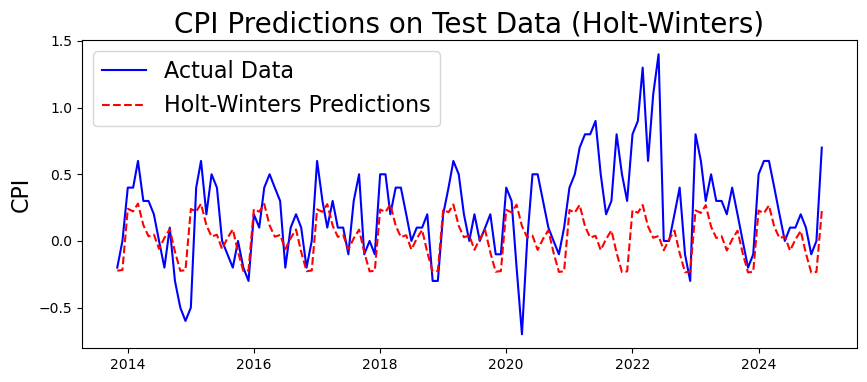

In [10]:
plt.figure(figsize=(10, 4))

plt.plot(HW_test.index, HW_test['CPI'], label='Actual Data', color='blue')
plt.plot(hw_forecast.index, hw_forecast, label='Holt-Winters Predictions', linestyle='--', color='red')

plt.legend(fontsize=16)
plt.title('CPI Predictions on Test Data (Holt-Winters)', fontsize=20)
plt.ylabel('CPI', fontsize=16)
plt.show()


NameError: name 'SARIMA_test' is not defined

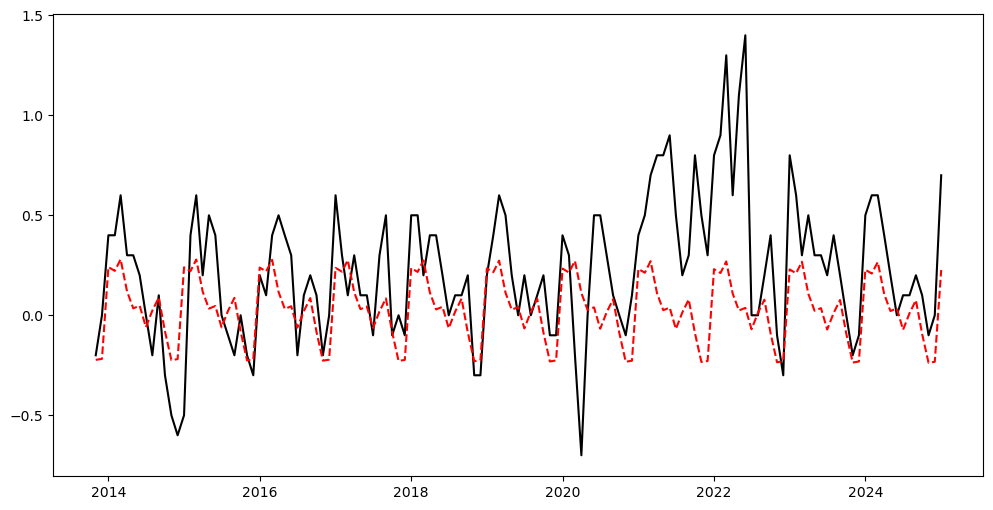

In [11]:
plt.figure(figsize=(12, 6))

plt.plot(HW_test.index, HW_test['CPI'], label='Actual Data', color='black')
plt.plot(hw_forecast.index, hw_forecast, label='Holt-Winters Predictions', linestyle='--', color='red')
plt.plot(SARIMA_test.index, SARIMA_predictions_test, label='SARIMA Predictions', linestyle='--', color='green')

plt.legend(fontsize=14)
plt.title('Comparison: Holt-Winters vs SARIMA', fontsize=18)
plt.ylabel('CPI', fontsize=14)
plt.show()
